In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

sns.set()

In [3]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = ['talk.politics.misc','talk.religion.misc','sci.space','rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[0])

From: arf@genesis.MCS.COM (Jack Schmidling)
Subject: The DEFAMATION LEAGUE
Organization: MCSNet Contributor, Chicago, IL
Lines: 235
Distribution: world
NNTP-Posting-Host: localhost.mcs.com

 
 The following was posted and no doubt retyped by Yigal Ahrens and considering 
 the importance of the issue and the almost total blackout except in 
 California, I am reposting to other appropriates groups.
 
 
 
 From LA Times, Friday, April 9, 1993.  P. A1.
 
 EVIDENCE OF ADL SPY OPERATION SEIZED BY POLICE
 
 By Richard C. Paddock, Times staff writer
 
 SAN FRANCISCO -- Police on Thursday served search warrants on the
 Anti-Defamation League here and in Los Angeles, seizing evidence of a
 nationwide intelligence network accused of keeping files on more than
 950 political groups, newspapers and labor unions and as many as
 12,000 people.
 
 Describing the spy operation in great detail, San Francisco
 authorities simultaneously released voluminous documents telling how
 operatives of the Anti-De

In [7]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.18, 0.5, 'predicted')

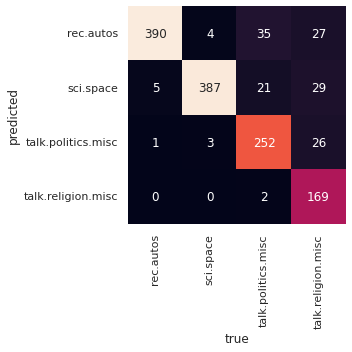

In [10]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')